K-means

On utilise un dataset "Fromage" disponible sur le site de Marie Chavent à Bordeaux.

In [1]:
import pandas as pnd

fromage = pnd.read_csv('http://kirschpm.fr/cours/PythonDataScience/files/fromage.csv', delimiter=';',  header=[0],index_col=[0])
fromage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, CarredelEst to Yaourtlaitent.nat.
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   calories     29 non-null     int64  
 1   sodium       29 non-null     float64
 2   calcium      29 non-null     float64
 3   lipides      29 non-null     float64
 4   retinol      29 non-null     float64
 5   folates      29 non-null     float64
 6   proteines    29 non-null     float64
 7   cholesterol  29 non-null     int64  
 8   magnesium    29 non-null     int64  
dtypes: float64(6), int64(3)
memory usage: 2.3+ KB


In [3]:
fromage.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


In [4]:
%matplotlib inline

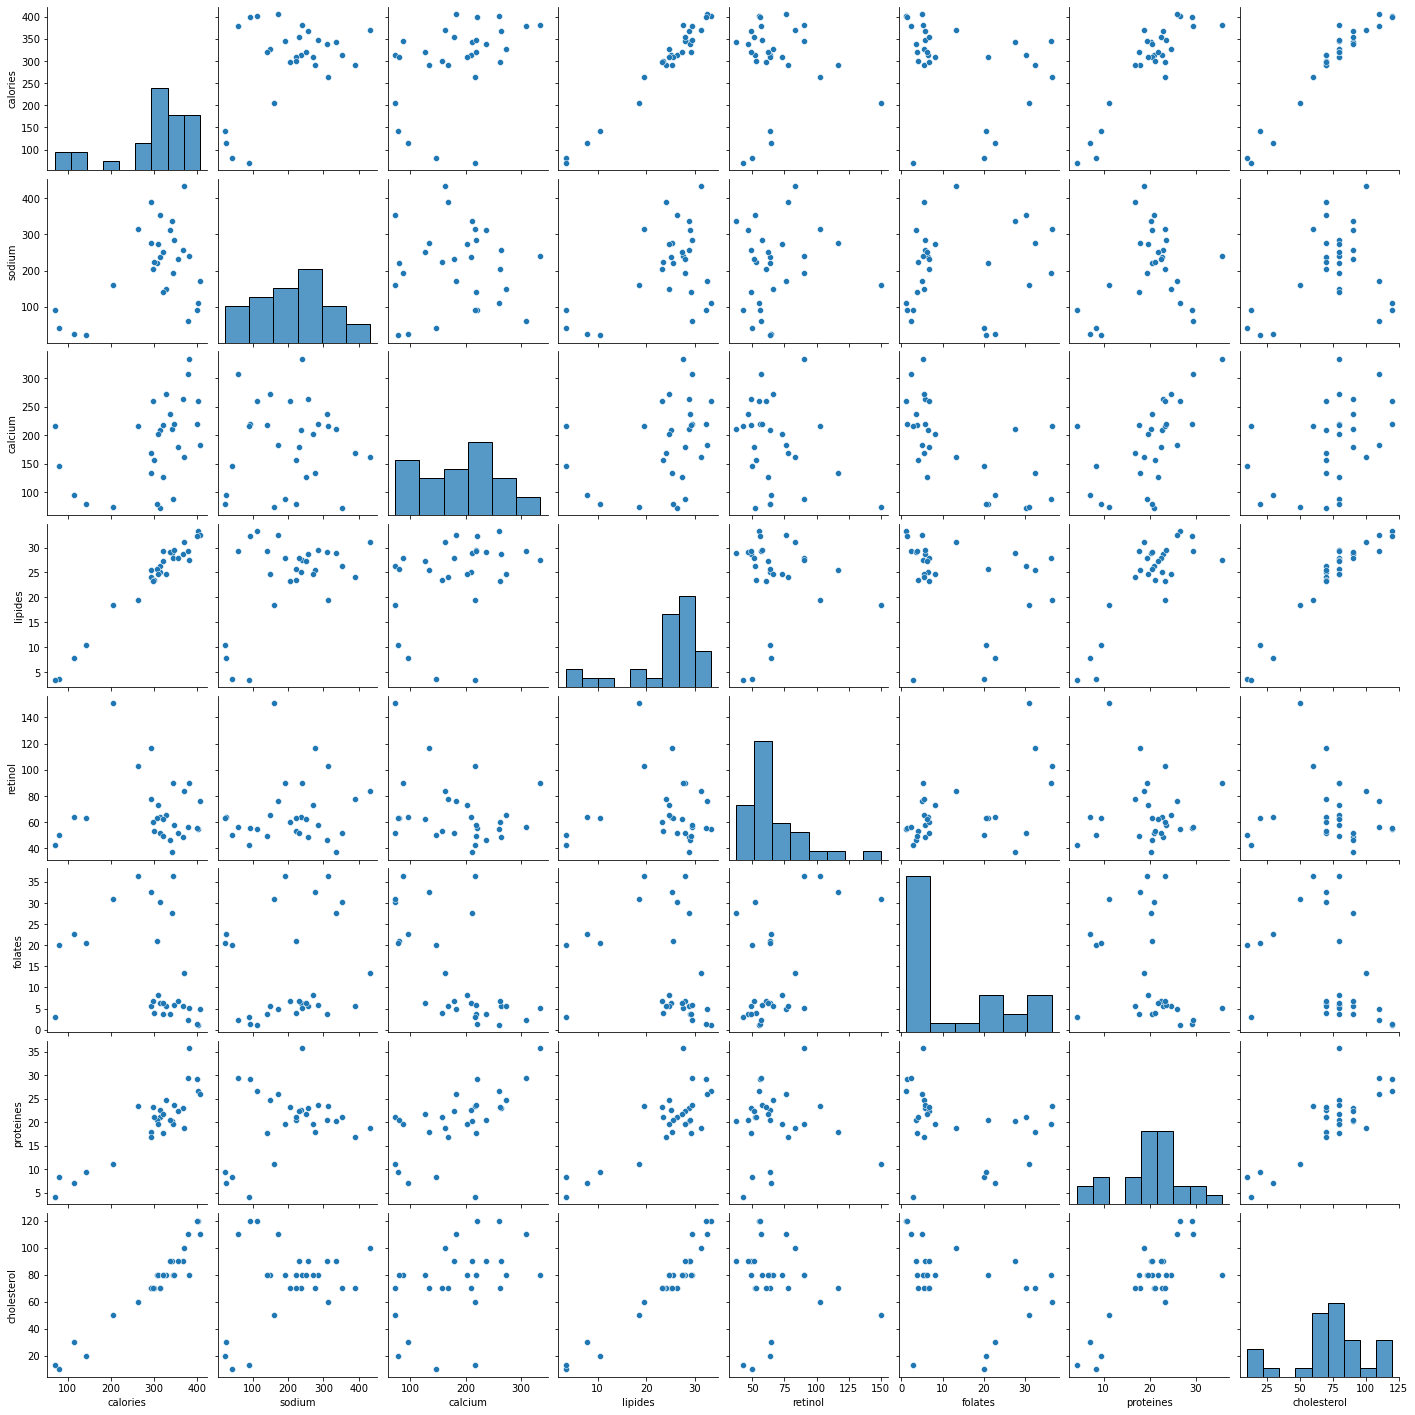

In [5]:
import seaborn as sns
grid = sns.pairplot(data=fromage, vars=fromage.columns[0:8])

In [6]:
from sklearn.cluster import KMeans
kmeansf = KMeans(n_clusters=4, random_state=11)
kmeansf.fit(fromage)

KMeans(n_clusters=4, random_state=11)

In [7]:
print(kmeansf.labels_)

[0 3 1 3 3 3 0 0 1 1 0 1 1 0 3 2 2 3 3 1 2 0 3 3 3 1 0 1 2]


In [9]:
import numpy as np
idk = np.argsort(kmeansf.labels_)

In [10]:
print(pnd.DataFrame(fromage.index[idk],kmeansf.labels_[idk]))

             Fromages
0         CarredelEst
0                Tome
0         PontlEveque
0           Chabichou
0            Chaource
0         Coulomniers
0  Fr.chevrepatemolle
1            Beaufort
1         SaintPaulin
1             Cheddar
1               Comte
1                Edam
1            Emmental
1            Vacherin
1            Parmesan
2       Petitsuisse40
2  Yaourtlaitent.nat.
2      Fr.frais20nat.
2      Fr.frais40nat.
3           Maroilles
3             Morbier
3              Cantal
3           Camembert
3            Pyrenees
3           Reblochon
3          Rocquefort
3                Bleu
3             Babybel
3         Fr.fondu.45


In [11]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [12]:
Z = linkage(fromage,method='ward',metric='euclidean')

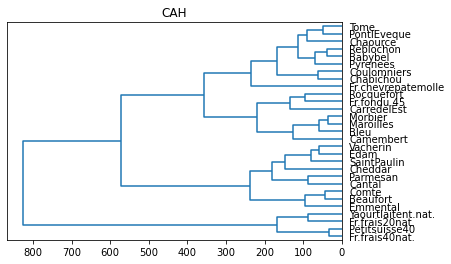

In [13]:
plt.title("CAH")
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=0)
plt.show()

In [14]:
groupes_cah = fcluster(Z,t=300,criterion='distance')
print(groupes_cah)

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]


In [15]:
import numpy as np
idg = np.argsort(groupes_cah)

In [16]:
print(pnd.DataFrame(fromage.index[idg],groupes_cah[idg]))

             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


In [17]:
pnd.crosstab(groupes_cah,kmeansf.labels_)

col_0,0,1,2,3
row_0,,,,
1,0,0,4,0
2,0,8,0,1
3,1,0,0,6
4,6,0,0,3
